# LECTURE 1

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:
img = cv2.imread('watch.jpg',cv2.IMREAD_GRAYSCALE)
#IMREAD_COLOR=1(COLOR),0(GRAYSCALE)
#IMREAD_UNCHANGED = -1


In [4]:
cv2.imshow('image',img)
cv2.waitKey(0)# wait for any key to be pressed.
cv2.destroyAllWindows()

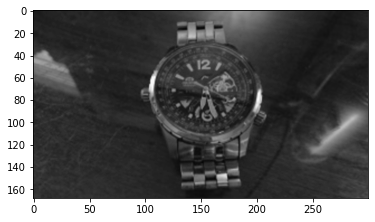

In [8]:
#showing using matplotlib:
plt.imshow(img, cmap = 'gray',interpolation ='bicubic')
plt.show()

In [9]:
#for saving
cv2.imwrite('watchgray.png',img)

True

# LECTURE 2

In [17]:
#for video capture
cap= cv2.VideoCapture(0) #0 if 1 web cam, 1 if 2
fourcc= cv2.VideoWriter_fourcc(*'XVID')
out= cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))
#Analysis Loop
while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    out.write(frame)
    cv2.imshow('face',frame)
    cv2.imshow('grayface',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()

# LECTURE 3

In [43]:
img= cv2.imread('watch.jpg',1)
cv2.line(img,(0,0),(150,150),(255,255,255), 10) # image to draw over, coordinates to start, end, brg, and line width
cv2.rectangle(img, (15,25), (200,150), (0,255,0), 5)
cv2.circle(img,(100,63),55,(0,0,255),-1)#minus 1 as width fills it right in
pts  = np.array([[10,5], [20,30],[70,20],[50,10]],np.int32)

font= cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV Tuts!',(0,130),font,1,(200,255,255), 2, cv2.LINE_AA)#anti aliasing
cv2.polylines(img,[pts],True,(0,255,255),3)
cv2.imshow('line here',img)
cv2.waitKey(0)
cv2.destroyAllWindows()



# LECTURE 4

In [50]:
img= cv2.imread('watch.jpg',1)
print(img[55,55])
img[55,55]= [255,255,255]
px=img[55,55]
print(px)

[29 31 42]
[255 255 255]


In [ ]:
roi= img[100:150,100:150] #region of image in terms of pixels
print(roi)

In [52]:
img[100:150,100:150] = [255,255,255] #convert the portion of pixels to white
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [54]:
#copy and paste ROI
watch_face = img[37:111, 107:194]
img[0:74, 0:87]= watch_face
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# LECTURE 5

In [57]:
img1= cv2.imread('3D-Matplotlib.png')
img2= cv2.imread('mainsvmimage.png')
#add = img1 +img2 # merge it all without losing any opacity#
#add = cv2.add(img1,img2) #pixel by pixel add
weighted = cv2.addWeighted(img1, 0.6,img2,0.4,0)
cv2.imshow('weighted',weighted)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [58]:
# Load two images
img1 = cv2.imread('3D-Matplotlib.png')
img2 = cv2.imread('mainlogo.png')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

# add a threshold
ret, mask = cv2.threshold(img2gray, 220, 255, cv2.THRESH_BINARY_INV)

mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv2.imshow('png',dst)
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

# LECTURE 6

In [61]:
img= cv2.imread('bookpage.jpg')
retval, threshold = cv2.threshold(img,12,255,cv2.THRESH_BINARY)

cv2.imshow('original',img)
grayscaled= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
retval2, threshold2 = cv2.threshold(grayscaled,12,255,cv2.THRESH_BINARY)

gaus= cv2.adaptiveThreshold(grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 115,1)
cv2.imshow('gaus',gaus)
cv2.imshow('threshold2',threshold2)
cv2.imshow('threshold',threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

# LECTURE 7

In [67]:
cap = cv2.VideoCapture(0)

while(1):
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)
    #averaging the pixels of noise
    kernel = np.ones((15,15),np.float32)/225
    smoothed = cv2.filter2D(res, -1,kernel)
    #gaussian blur
    blur= cv2.GaussianBlur(res, (15,15),0)
    #median blur
    median= cv2.medianBlur(res,15)
    #bilateral-
    bilateral = cv2.bilateralFilter(res,15,75,75)

    cv2.imshow('frame',frame)
    #cv2.imshow('mask',mask)
    #cv2.imshow('res',res)
    #cv2.imshow('smothed',smoothed)
    #cv2.imshow('blur',blur)    
    #cv2.imshow('median',median)
    #cv2.show('bilateral',bilateral)

    
    k = cv2.waitKey(5) & 0xFF
    if k == 27: #escape key
        break

cv2.destroyAllWindows()
cap.release()

# LECTURE 9

In [ ]:
cap = cv2.VideoCapture(0)

while(1):
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()